In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [63]:
df = pd.read_csv('Bengaluru_House_Data.csv')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [64]:
df = df.drop(['area_type','availability','society','balcony'],axis='columns')
df.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [65]:
df.shape

(13320, 5)

In [66]:
df.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [67]:
df = df.dropna()

In [68]:
df.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [69]:
def convert_size(x):
    x = x.split()
    return x[0]

df['size'] = df['size'].apply(convert_size)
df.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2,1056,2.0,39.07
1,Chikka Tirupathi,4,2600,5.0,120.00
2,Uttarahalli,3,1440,2.0,62.00
3,Lingadheeranahalli,3,1521,3.0,95.00
4,Kothanur,2,1200,2.0,51.00


In [70]:
df.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [71]:
def convert_area(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None
    
df['total_sqft'] = df['total_sqft'].apply(convert_area)
df.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2,1056.0,2.0,39.07
1,Chikka Tirupathi,4,2600.0,5.0,120.00
2,Uttarahalli,3,1440.0,2.0,62.00
3,Lingadheeranahalli,3,1521.0,3.0,95.00
4,Kothanur,2,1200.0,2.0,51.00


In [72]:
df.total_sqft.unique()

array([1056. , 2600. , 1440. , ..., 1258.5,  774. , 4689. ])

In [73]:
df['price_per_sqft'] = (df['price']*100000)/df['total_sqft']
df.head()

,location,size,total_sqft,bath,price,price_per_sqft
0,Electronic City Phase II,2,1056.0,2.0,39.07,3699.810606
1,Chikka Tirupathi,4,2600.0,5.0,120.00,4615.384615
2,Uttarahalli,3,1440.0,2.0,62.00,4305.555556
3,Lingadheeranahalli,3,1521.0,3.0,95.00,6245.890861
4,Kothanur,2,1200.0,2.0,51.00,4250.000000


In [74]:
df1 = df.copy()
len(df1.location.unique())

1304

In [75]:
locations = df1.groupby('location')['location'].agg('count').sort_values(ascending=False)
locations

location
Whitefield                            534
Sarjapur  Road                        392
Electronic City                       302
Kanakpura Road                        266
Thanisandra                           233
                                     ... 
Konappana Agrahara                      1
Kodanda Reddy Layout                    1
Kirloskar layout, Basaveshwarnagar      1
Kengeri Satellite Town Stage II         1
 Anekal                                 1
Name: location, Length: 1304, dtype: int64

In [76]:
locations_less_than_10 = locations[locations<=10]
locations_less_than_10

location
Ganga Nagar                           10
Nagappa Reddy Layout                  10
BTM 1st Stage                         10
Dodsworth Layout                      10
Kalkere                               10
                                      ..
Konappana Agrahara                     1
Kodanda Reddy Layout                   1
Kirloskar layout, Basaveshwarnagar     1
Kengeri Satellite Town Stage II        1
 Anekal                                1
Name: location, Length: 1063, dtype: int64

In [77]:
df1['location'] = df1['location'].apply(lambda x: 'Other' if x in locations_less_than_10 else x)

In [78]:
len(df1.location.unique())

242

In [79]:
df1.shape

(13246, 6)

In [80]:
df2 = df1.copy()
df2.head()

,location,size,total_sqft,bath,price,price_per_sqft
0,Electronic City Phase II,2,1056.0,2.0,39.07,3699.810606
1,Chikka Tirupathi,4,2600.0,5.0,120.00,4615.384615
2,Uttarahalli,3,1440.0,2.0,62.00,4305.555556
3,Lingadheeranahalli,3,1521.0,3.0,95.00,6245.890861
4,Kothanur,2,1200.0,2.0,51.00,4250.000000


In [81]:
df2 = df2.dropna()
df2.isnull().sum()

location          0
size              0
total_sqft        0
bath              0
price             0
price_per_sqft    0
dtype: int64

In [82]:
df2.head()

,location,size,total_sqft,bath,price,price_per_sqft
0,Electronic City Phase II,2,1056.0,2.0,39.07,3699.810606
1,Chikka Tirupathi,4,2600.0,5.0,120.00,4615.384615
2,Uttarahalli,3,1440.0,2.0,62.00,4305.555556
3,Lingadheeranahalli,3,1521.0,3.0,95.00,6245.890861
4,Kothanur,2,1200.0,2.0,51.00,4250.000000


In [83]:
df2.price_per_sqft.describe()

count    1.320000e+04
mean     7.920759e+03
std      1.067272e+05
min      2.678298e+02
25%      4.267701e+03
50%      5.438331e+03
75%      7.317073e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

In [84]:
df2.shape

(13200, 6)

In [85]:
min_quat,max_quat = df2.price_per_sqft.quantile([0.001,0.999])
min_quat,max_quat

(1366.755485893417, 50959.580419581405)

In [86]:
df3 = df2.copy()
df3.head()

,location,size,total_sqft,bath,price,price_per_sqft
0,Electronic City Phase II,2,1056.0,2.0,39.07,3699.810606
1,Chikka Tirupathi,4,2600.0,5.0,120.00,4615.384615
2,Uttarahalli,3,1440.0,2.0,62.00,4305.555556
3,Lingadheeranahalli,3,1521.0,3.0,95.00,6245.890861
4,Kothanur,2,1200.0,2.0,51.00,4250.000000


In [87]:
df3 = df3[(df3['price_per_sqft']>min_quat)&(df3['price_per_sqft']<max_quat)]
df3.head()

,location,size,total_sqft,bath,price,price_per_sqft
0,Electronic City Phase II,2,1056.0,2.0,39.07,3699.810606
1,Chikka Tirupathi,4,2600.0,5.0,120.00,4615.384615
2,Uttarahalli,3,1440.0,2.0,62.00,4305.555556
3,Lingadheeranahalli,3,1521.0,3.0,95.00,6245.890861
4,Kothanur,2,1200.0,2.0,51.00,4250.000000


In [88]:
df3.shape

(13172, 6)

In [89]:
df3.price_per_sqft.describe()

count    13172.000000
mean      6664.076398
std       4141.008916
min       1379.310345
25%       4271.314198
50%       5438.331478
75%       7311.582275
max      50349.650350
Name: price_per_sqft, dtype: float64

In [90]:
min_4_std = df3.price_per_sqft.mean() - 4*df3.price_per_sqft.std()
max_4_std = df3.price_per_sqft.mean() + 4*df3.price_per_sqft.std()
df4 = df3.copy()
# df4[(df4['price_per_sqft']<min_4_std)|(df4['price_per_sqft']>max_4_std)]
df4 = df4[(df4['price_per_sqft']>min_4_std)&(df4['price_per_sqft']<max_4_std)]

In [91]:
df4.shape

(13047, 6)

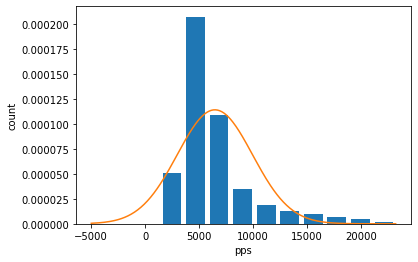

In [92]:
plt.hist(df4.price_per_sqft,bins=10,rwidth=0.8,density=True)
plt.xlabel("pps")
plt.ylabel('count')
from scipy.stats import norm
rng = np.arange(-5000,df4.price_per_sqft.max(),100)
plt.plot(rng,norm.pdf(rng,df4.price_per_sqft.mean(),df4.price_per_sqft.std()))

In [93]:
df5 = df3.copy()
df5.head()

,location,size,total_sqft,bath,price,price_per_sqft
0,Electronic City Phase II,2,1056.0,2.0,39.07,3699.810606
1,Chikka Tirupathi,4,2600.0,5.0,120.00,4615.384615
2,Uttarahalli,3,1440.0,2.0,62.00,4305.555556
3,Lingadheeranahalli,3,1521.0,3.0,95.00,6245.890861
4,Kothanur,2,1200.0,2.0,51.00,4250.000000


In [94]:
df5['z_score'] = df5.price_per_sqft.apply(lambda x : (x-df5.price_per_sqft.mean())/df5.price_per_sqft.std())
df5.head()

,location,size,total_sqft,bath,price,price_per_sqft,z_score
0,Electronic City Phase II,2,1056.0,2.0,39.07,3699.810606,-0.715832
1,Chikka Tirupathi,4,2600.0,5.0,120.00,4615.384615,-0.494733
2,Uttarahalli,3,1440.0,2.0,62.00,4305.555556,-0.569552
3,Lingadheeranahalli,3,1521.0,3.0,95.00,6245.890861,-0.100986
4,Kothanur,2,1200.0,2.0,51.00,4250.000000,-0.582968


In [95]:
df5 = df5[(df5['z_score']>-4)&(df5['z_score']<4)]
df5.shape

(13047, 7)

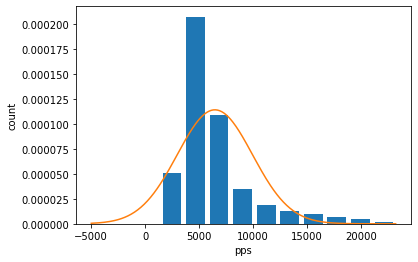

In [96]:
plt.hist(df5.price_per_sqft,bins=10,rwidth=0.8,density=True)
plt.xlabel("pps")
plt.ylabel('count')
rng = np.arange(-5000,df5.price_per_sqft.max(),100)
plt.plot(rng,norm.pdf(rng,df5.price_per_sqft.mean(),df5.price_per_sqft.std()))

In [97]:
df6 = df5.copy()
df6.head()

,location,size,total_sqft,bath,price,price_per_sqft,z_score
0,Electronic City Phase II,2,1056.0,2.0,39.07,3699.810606,-0.715832
1,Chikka Tirupathi,4,2600.0,5.0,120.00,4615.384615,-0.494733
2,Uttarahalli,3,1440.0,2.0,62.00,4305.555556,-0.569552
3,Lingadheeranahalli,3,1521.0,3.0,95.00,6245.890861,-0.100986
4,Kothanur,2,1200.0,2.0,51.00,4250.000000,-0.582968


In [98]:
def remove_bhk(df):
    indices_to_exclude = np.array([])
    for loca, loca_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in loca_df.groupby('size'):
            bhk_stats[int(bhk)] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in loca_df.groupby('size'):
            stats = bhk_stats.get(int(bhk)-1)
            if stats and stats['count']>5:
                indices_to_exclude = np.append(indices_to_exclude, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(indices_to_exclude, axis='index')

df6 = remove_bhk(df5)
df6.shape            

(9269, 7)

(array([4.47645999e-01, 1.84236952e-01, 7.64334382e-02, 4.62252172e-02,
        6.05824211e-03, 4.14948090e-03, 3.23659510e-03, 2.48968854e-04,
        4.14948090e-04, 1.65979236e-04, 1.65979236e-04, 8.29896180e-05,
        0.00000000e+00, 8.29896180e-05, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 8.29896180e-05]),
 array([ 1. ,  2.3,  3.6,  4.9,  6.2,  7.5,  8.8, 10.1, 11.4, 12.7, 14. ,
        15.3, 16.6, 17.9, 19.2, 20.5, 21.8, 23.1, 24.4, 25.7, 27. ]),
 <BarContainer object of 20 artists>)

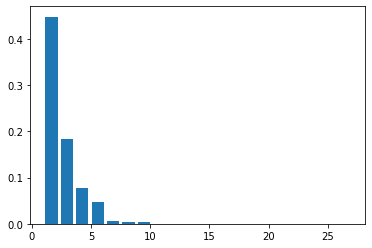

In [99]:
plt.hist(df6.bath,bins=20,rwidth=0.8,density=True)

In [100]:
df6['size'] = df6['size'].apply(lambda x : float(x))
df7 = df6[df6['bath']<df6['size']+2]
df7.shape

(9135, 7)

In [101]:
df7 = df7.drop(['price_per_sqft','z_score'],axis='columns')
df7.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2.0,1056.0,2.0,39.07
2,Uttarahalli,3.0,1440.0,2.0,62.00
3,Lingadheeranahalli,3.0,1521.0,3.0,95.00
4,Kothanur,2.0,1200.0,2.0,51.00
6,Old Airport Road,4.0,2732.0,4.0,204.00


In [102]:
dummies = pd.get_dummies(df7.location)
dummies

,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13314,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13316,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13317,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13318,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [103]:
dummies['Other']

0        0
2        0
3        0
4        0
6        0
        ..
13314    0
13316    1
13317    0
13318    0
13319    0
Name: Other, Length: 9135, dtype: uint8

In [104]:
df8 = pd.concat([df7.drop(['location'],axis='columns'),dummies.drop(['Other'],axis='columns')],axis='columns')
df8.head()

,size,total_sqft,bath,price,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2.0,1056.0,2.0,39.07,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3.0,1440.0,2.0,62.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3.0,1521.0,3.0,95.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2.0,1200.0,2.0,51.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,4.0,2732.0,4.0,204.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [105]:
X = df8.drop(['price'],axis='columns')
y = df8.price

In [106]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [107]:
from sklearn.linear_model import LinearRegression
model_lr = LinearRegression()
model_lr.fit(X_train,y_train)
model_lr.score(X_test,y_test)

0.6943062335843164

In [108]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,linear_regression,0.710985,{'normalize': True}
1,lasso,0.654963,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.613841,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [109]:
import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(model_lr,f)

In [110]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))